# Improving Model Performance - I

- In the previous segments, we saw how to perform dimensionality reduction using PCA and then immediately were introduced to one of its key applications which are for data visualisation. - However, the most common application of PCA is to improve the model's performance. 
- So in real life, we use PCA in conjunction with any other model like Linear Regression, Logistic Regression, Clustering amongst others in order to make the process more efficient. - - In the following demonstration, we'll be looking at both the scenarios - performing model building without PCA and then with PCA to appreciate how much faster it is to get similar or better results in the latter case.

### Overview of the Demo
- For this demonstration, our main model will be a logistic regression setup. 
- As mentioned above, first we'll be performing Logistic Regression directly without any PCA. For this demo, we'll be using the Telecom Churn dataset that you have worked earlier with.

## Telecom Churn: Logistic Regression with PCA

With 21 predictor variables, we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, customer attrition is referred to as 'churn'.

### First we will build the model without PCA

In [223]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## filtering warnings
import warnings
warnings.filterwarnings('ignore')

### Importing and merging data

In [224]:
churn_data = pd.read_csv('churn_data.csv')
customer_data = pd.read_csv('customer_data.csv')
internet_data = pd.read_csv('internet_data.csv')

In [225]:
print(churn_data.shape)
print(customer_data.shape)
print(internet_data.shape)

(7043, 9)
(7043, 5)
(7043, 9)


- Same number of rows in all the datasets

In [226]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [227]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [228]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


### Creating the merged dataframe telecom

In [229]:
df1 = pd.merge(churn_data,customer_data,on='customerID',how='inner')
df1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [230]:
telecom = pd.merge(df1,internet_data,on='customerID',how='inner')
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [231]:
telecom.shape

(7043, 21)

In [232]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [233]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [234]:
len(telecom.index)

7043

In [235]:
(telecom.isnull().sum()/len(telecom.index))*100

customerID          0.0
tenure              0.0
PhoneService        0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64

- No null values

In [236]:
## unique values
telecom.nunique()

customerID          7043
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
dtype: int64

In [237]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [238]:
## dataframe of categorical variables
telecom_cat = telecom.drop(['customerID','MonthlyCharges','TotalCharges'],axis=1)
telecom_cat.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,45,No,One year,No,Bank transfer (automatic),No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [239]:
telecom_cat.shape

(7043, 18)

### Data Preperation

- Let's convert yes and no to 1 and o respectively
- Let's make one sub df telecom_yn which will only contain all thr yes and no variables

In [240]:
## lets first see how many coulmns have only yes and no
telecom.nunique()

customerID          7043
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
dtype: int64

- We can see that ['PhoneService','PaperlessBilling','Churn','gender','SeniorCitizen','Partner','Dependents']
are the coulmns wiht only 2 unique values.
- Let's see out of these how many are yes/no

In [241]:
telecom[['PhoneService','PaperlessBilling','Churn','gender','SeniorCitizen','Partner','Dependents']].head()

,PhoneService,PaperlessBilling,Churn,gender,SeniorCitizen,Partner,Dependents
0,No,Yes,No,Female,0,Yes,No
1,Yes,No,No,Male,0,No,No
2,Yes,Yes,Yes,Male,0,No,No
3,No,No,No,Male,0,No,No
4,Yes,Yes,Yes,Female,0,No,No


- 'gender' and 'SeniorCitizen' are not yes/no 
- 'PhoneService','PaperlessBilling','Churn','Partner','Dependents' are yes/no

In [242]:
## converting to 0 and 1
## lets call these columns as var_list
var_list = ['PhoneService','PaperlessBilling','Churn','Partner','Dependents']
telecom[var_list] = telecom[var_list].apply(lambda x: x.map({'Yes':1,'No':0}))

In [243]:
## setting dispaly settings
pd.set_option('display.max_columns',50)

In [244]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


- Yes/ No columns successfully mapped to 1/0

In [245]:
telecom['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

### Creating dummy variables

In [246]:
telecom_cat.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,45,No,One year,No,Bank transfer (automatic),No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [247]:
telecom_cat.nunique()

tenure              73
PhoneService         2
Contract             3
PaperlessBilling     2
PaymentMethod        4
Churn                2
gender               2
SeniorCitizen        2
Partner              2
Dependents           2
MultipleLines        3
InternetService      3
OnlineSecurity       3
OnlineBackup         3
DeviceProtection     3
TechSupport          3
StreamingTV          3
StreamingMovies      3
dtype: int64

- We need to create dummy varaibles for :
['Contract','PaymentMethod','gender','MultipleLines','InternetService',OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
- Now we will be creating the dummy varaiables in 2 leveles:
   - 1. We will create dummy variables for ['Contract','PaymentMethod','gender','InternetService'] and simply use drop_first=True
   - 2. For ['MultipleLines','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'], when we will create the dummy variables, we will see some columns with very big names like 'MultipleLines_No phone service', so we will be dropping these manully.
- No need to create dummy variables for SeniorCitizen as it is already numeric categorical
- Let's create the dummy variales.

In [248]:
## checking lables in ['Contract','PaymentMethod','gender','InternetService'] 
print(telecom['Contract'].unique())
print(telecom['PaymentMethod'].unique())
print(telecom['gender'].unique())
print(telecom['InternetService'].unique())

['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['Female' 'Male']
['DSL' 'Fiber optic' 'No']


In [249]:
## checking lables in 
##['MultipleLines','OnlineBackup','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
print(telecom['MultipleLines'].unique())
print(telecom['DeviceProtection'].unique())
print(telecom['OnlineSecurity'].unique())
print(telecom['OnlineBackup'].unique())
print(telecom['TechSupport'].unique())
print(telecom['StreamingTV'].unique())
print(telecom['StreamingMovies'].unique())


['No phone service' 'No' 'Yes']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


- For many columns the names of the dummy varaibles would become same and this woul create confusion.
- So we will attach suffix to each dummy varaible column created to identify which dummy variable belongs to which orignal variable.
- ['MultipleLines','InternetService',OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [250]:
## creating dummy variables for  ['Contract','PaymentMethod','gender','InternetService'] 
dummy1 = pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)
dummy1.head()

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,1,0,0
2,0,0,0,0,1,1,0,0
3,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,1,0


In [251]:
## concatenating with telecom
telecom = pd.concat([telecom,dummy1],axis=1)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0


In [252]:
## dropping the columns for which we just made the dummy variables
telecom = telecom.drop(['Contract','PaymentMethod','gender','InternetService'],axis=1)
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,No phone service,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,No,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,No,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,No phone service,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,No,No,No,No,No,No,No,0,0,0,1,0,0,1,0


#### creating the second level of dummy variables
- ['MultipleLines','InternetService',OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

- For many columns the names of the dummy varaibles would become same and this woul create confusion.
- So we will attach suffix to each dummy varaible column created to identify which dummy variable belongs to which orignal variable.
- ['MultipleLines','InternetService',OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [253]:
## 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
ml

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7038,0,0,1
7039,0,0,1
7040,0,1,0
7041,0,0,1


In [254]:
## dropping MultipleLines_No phone service
ml = ml.drop('MultipleLines_No phone service',axis=1)
ml

,MultipleLines_No,MultipleLines_Yes
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
7038,0,1
7039,0,1
7040,0,0
7041,0,1


In [255]:
## concatenating ml with telecom
telecom = pd.concat([telecom,ml],axis=1)
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,No phone service,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,No,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,No,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,No phone service,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,No,No,No,No,No,No,No,0,0,0,1,0,0,1,0,1,0


In [256]:
## repeating the same procedure for other columns
## ['Multiplelines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

## OnlineSecurity
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1 = os.drop('OnlineSecurity_No internet service',axis = 1)
telecom = pd.concat([telecom,os1],axis=1)

## OnlineBackup
ob = pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1 = ob.drop('OnlineBackup_No internet service',axis = 1)
telecom = pd.concat([telecom,ob1],axis=1)

## DeviceProtection
dp = pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop('DeviceProtection_No internet service',axis = 1)
telecom = pd.concat([telecom,dp1],axis=1)

## TechSupport
ts = pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1 = ts.drop('TechSupport_No internet service',axis = 1)
telecom = pd.concat([telecom,ts1],axis=1)

## StreamingTV
st = pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1 = st.drop('StreamingTV_No internet service',axis = 1)
telecom = pd.concat([telecom,st1],axis=1)
## StreamingMovies
sm = pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop('StreamingMovies_No internet service',axis = 1)
telecom = pd.concat([telecom,sm1],axis=1)

In [257]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,No phone service,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,No,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,No,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,No phone service,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,No,No,No,No,No,No,No,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [258]:
telecom.shape

(7043, 39)

In [259]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [260]:
## dropping columns for which the dummy variables were made
telecom = telecom.drop(['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                         'TechSupport','StreamingTV','StreamingMovies'],axis=1)
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [261]:
telecom.shape

(7043, 32)

In [262]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

- Total charges is object, it has to be converted to numeric

In [263]:
telecom['TotalCharges'].iloc[488]

' '

In [264]:
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'],errors='coerce')

In [265]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

- Because we used errors='coerce, the invalid values in TotalCharges were set to NaN, hence generating null values.
- These null values in TotalCharges will have to be dealt with

In [266]:
## % null values
(telecom.isnull().sum()/len(telecom))*100

customerID                               0.000000
tenure                                   0.000000
PhoneService                             0.000000
PaperlessBilling                         0.000000
MonthlyCharges                           0.000000
TotalCharges                             0.156183
Churn                                    0.000000
SeniorCitizen                            0.000000
Partner                                  0.000000
Dependents                               0.000000
Contract_One year                        0.000000
Contract_Two year                        0.000000
PaymentMethod_Credit card (automatic)    0.000000
PaymentMethod_Electronic check           0.000000
PaymentMethod_Mailed check               0.000000
gender_Male                              0.000000
InternetService_Fiber optic              0.000000
InternetService_No                       0.000000
MultipleLines_No                         0.000000
MultipleLines_Yes                        0.000000


- Very minute percentage of null values, so we can safely drop them.

In [267]:
## dropping null values
telecom = telecom[~np.isnan(telecom['TotalCharges'])]
## telecom = telecom.dropna() would've done the same !

In [268]:
## checking spread
telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,0.162400,0.482509,0.298493,0.209329,0.239619,0.216297,0.336320,0.228100,0.504693,0.440273,0.216155,0.481371,0.421928,0.497298,0.286547,0.438993,0.344852,0.439989,0.343857,0.493743,0.290102,0.399460,0.384386,0.395478,0.388367
std,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,0.368844,0.499729,0.457629,0.406858,0.426881,0.411748,0.472483,0.419637,0.500014,0.496455,0.411650,0.499688,0.493902,0.500028,0.452180,0.496300,0.475354,0.496421,0.475028,0.499996,0.453842,0.489822,0.486484,0.488988,0.487414
min,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
90%,69.000000,1.000000,1.000000,102.645000,5976.640000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
95%,72.000000,1.000000,1.000000,107.422500,6923.590000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99%,72.000000,1.000000,1.000000,114.734500,8039.883000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- No significant outliers

- No missing values, all dtypes are in order and no significant outliers
- EDA complete, Data ready from model building

### Data Preprocessing
- X and y labels and checking corr within X
- Scaling
- train_test_split

####  Creating X and y lables

In [269]:
## y label
y = telecom[['Churn']]
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [270]:
## X label
X = telecom.drop(['Churn','customerID'],axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

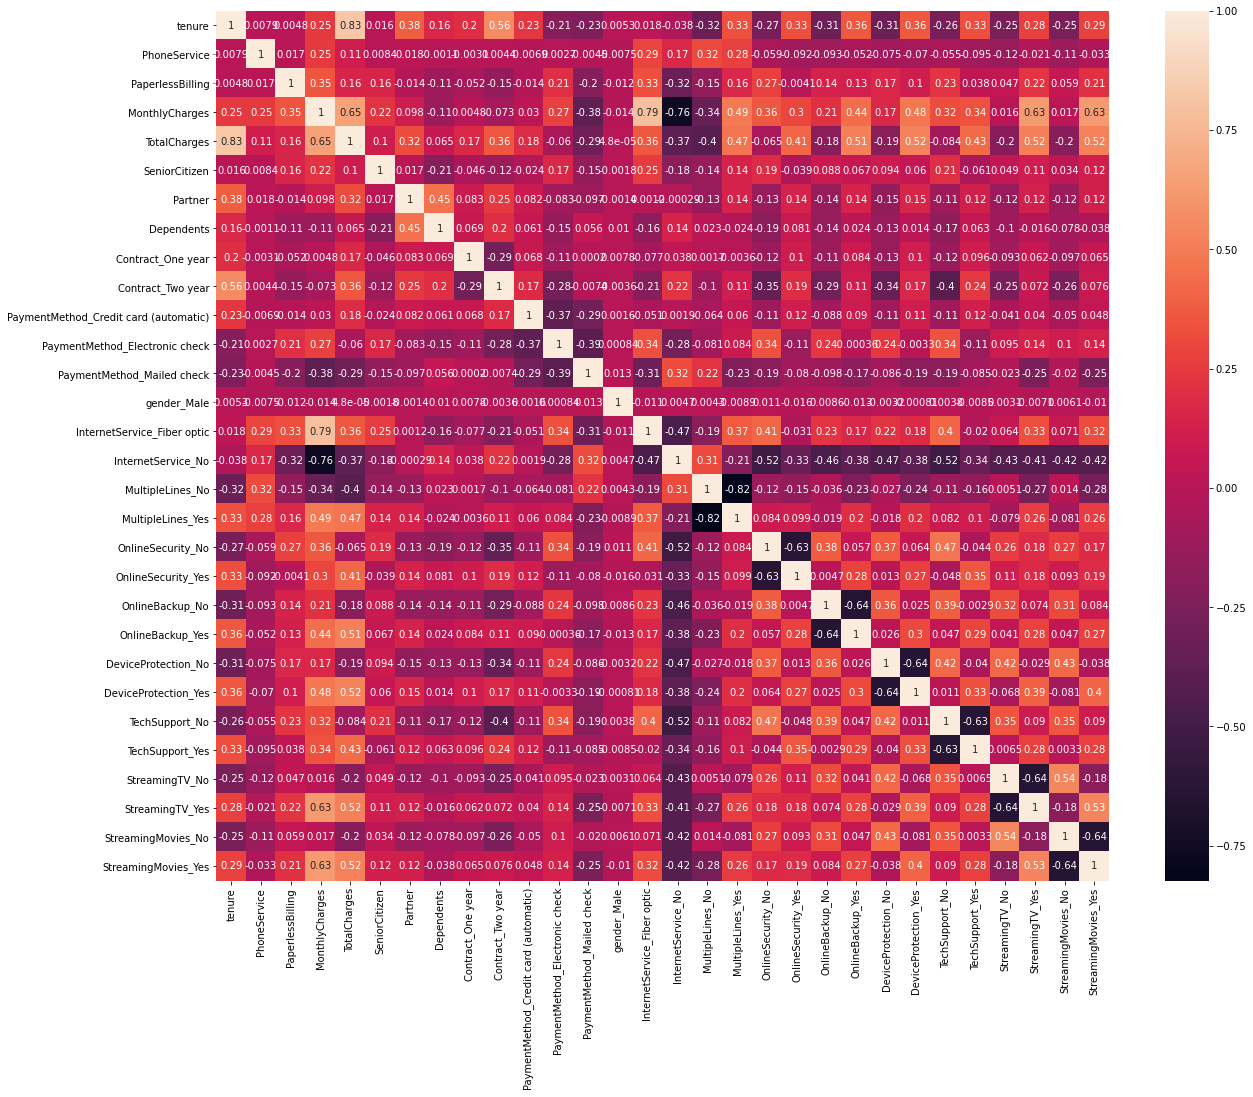

In [271]:
## checking correlations
plt.figure(figsize=(20,16))
sns.heatmap(X.corr(),annot=True)
plt.show

- High Correlations columns to be dropped
['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No']

In [272]:
## Dropping high correlation columns
X = X.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

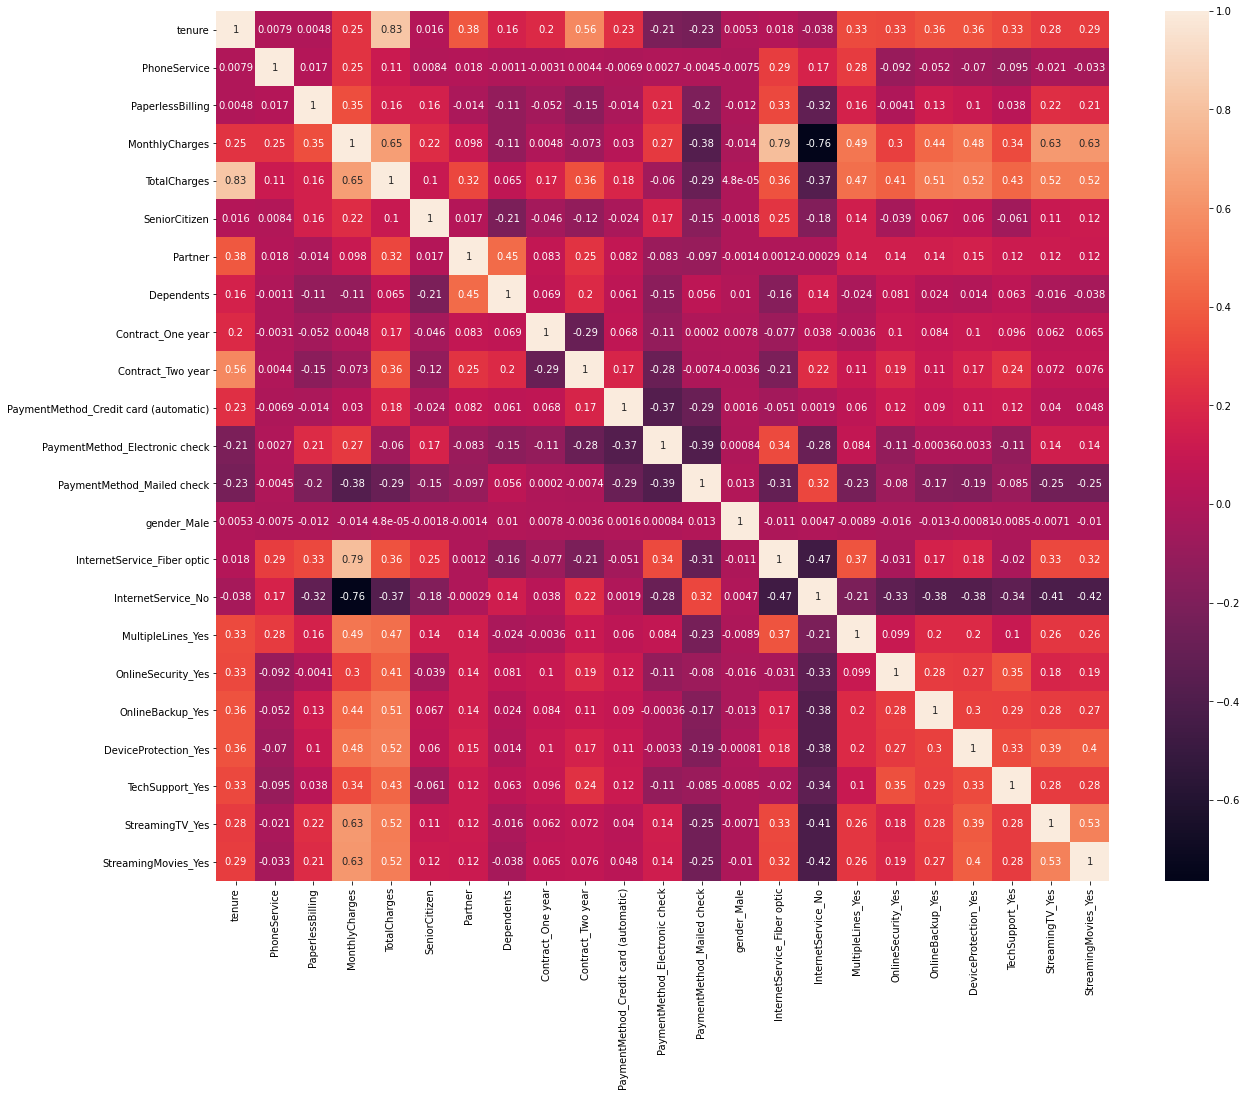

In [273]:
## checking correlations again
plt.figure(figsize=(20,16))
sns.heatmap(X.corr(),annot=True)
plt.show

#### Scaling

In [274]:
## importing libraries
from sklearn.preprocessing import StandardScaler

In [275]:
## we scale only the continous numeric variables
## 'tenure','MonthlyCharges','TotalCharges'
## rest all the columns lie between 0 and 1
num_vars = ['tenure','MonthlyCharges','TotalCharges']

In [276]:
## instantiating scaler object
scaler = StandardScaler()
## fit_transfrom
X[num_vars] = scaler.fit_transform(X[num_vars])

In [277]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,-1.280248,0,1,-1.161694,-0.994194,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0.064303,1,0,-0.260878,-0.173740,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0
2,-1.239504,1,1,-0.363923,-0.959649,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0
3,0.512486,0,0,-0.747850,-0.195248,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0
4,-1.239504,1,1,0.196178,-0.940457,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [278]:
X.describe()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
count,7.032000e+03,7032.000000,7032.000000,7.032000e+03,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,-1.214741e-16,0.903299,0.592719,9.652878e-17,-1.172113e-16,0.162400,0.482509,0.298493,0.209329,0.239619,0.216297,0.336320,0.228100,0.504693,0.440273,0.216155,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367
std,1.000071e+00,0.295571,0.491363,1.000071e+00,1.000071e+00,0.368844,0.499729,0.457629,0.406858,0.426881,0.411748,0.472483,0.419637,0.500014,0.496455,0.411650,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414
min,-1.280248e+00,0.000000,0.000000,-1.547283e+00,-9.990692e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.542963e-01,1.000000,0.000000,-9.709769e-01,-8.302488e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.394171e-01,1.000000,1.000000,1.845440e-01,-3.908151e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.199259e-01,1.000000,1.000000,8.331482e-01,6.668271e-01,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.612573e+00,1.000000,1.000000,1.793381e+00,2.824261e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Scaling Done

#### checking churn rate

In [279]:
(telecom['Churn'].sum()/len(telecom['Churn']))*100

26.578498293515356

- Around 26.5 % churn rate

#### train_test_split

In [280]:
## importing libraries
from sklearn.model_selection import train_test_split

In [281]:
## splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [282]:
## checking 
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7032, 23)
(7032, 1)
(4922, 23)
(4922, 1)
(2110, 23)
(2110, 1)


In [283]:
## cheking for any class inbalance in y_train and y_test
print((y_train.sum()/len(y_train))*100)
print((y_test.sum()/len(y_test))*100)

Churn    26.147907
dtype: float64
Churn    27.582938
dtype: float64


- Figures are almost similar
- No class imbalance

### Model Building
- We will be using statsmodel.api to build our model as we want to see the various stats to better e=valuate the model as we build it along.
-  For logistic regression, we use GLM to build the model as opposed to OLS that we used during linear regression

### Steps:
- 1. Defining X_train and adding constant
- 2. Creating a model object
- 3. Fitting that object into the model

In [284]:
## importing libraries
import statsmodels.api as sm

In [285]:
## instantiating model object
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 21 Jun 2021   Deviance:                       4009.4
Time:                        08:50:46   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9338      1.545     -2.545      0.011      -6.963      -0.905
tenure                                   -1.5197      0.190     -8.015      0.000      -1.891      -1.148
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1815      1.160     -1.880      0.060      -4.455       0.092
TotalCharges                              0.7328      0.198      3.705      0.000       0.345       1.120
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

In [286]:
## Checking VIF
## importing libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
## Create a dataframe that will contain the names of all the feature variables
## and their respective VIFs
X = sm.add_constant(X_train)
vif = pd.DataFrame()    ##created dataframe
vif['Features'] = X.columns  ## the features column should contain names of all the columns
                             ## in the dataframe X_train_sm
## creating the VIF column
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
## arranging VIF scorers
vif = vif.sort_values(by = 'VIF',ascending = False)
## showing vif
vif

,Features,VIF
0,const,1555.88
4,MonthlyCharges,877.56
15,InternetService_Fiber optic,150.00
16,InternetService_No,106.07
2,PhoneService,35.14
23,StreamingMovies_Yes,24.47
22,StreamingTV_Yes,24.37
5,TotalCharges,10.88
1,tenure,7.63
17,MultipleLines_Yes,7.33


- Many correlated variables with high p-values.
- Very High VIFs for many varaibles.
- Now instead of dropping them manually let's use RFE to automatically select features

### Using RFE
- Import RFE from sklearn.feature_selection
#### Steps:
- 1. Instantiate Vanilla Logistic Regression Model
- 2. Create RFE object
- 3. Fitting X_train and y_train on RFE object
- 4. Checking RFE columns using rfe.support_

In [287]:
## importing libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [288]:
## instantiating vanilla Logistic Regression Model
lr = LogisticRegression()
## creating RFE objecc
rfe = RFE(lr,13)
## fitting 
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=13)

In [289]:
## checking RFE support
rfe.support_

array([ True, False, False,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False, False,  True,  True])

In [290]:
## RFE ranking
rfe.ranking_

array([ 1,  5,  2,  1,  1,  1,  9,  8,  1,  1,  1,  6,  1, 10,  1,  1,  1,
        4,  7, 11,  3,  1,  1])

In [291]:
## name of RFE columns with ranking
## using Zip fucntion to zip the three lists
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('tenure', True, 1),
 ('PhoneService', False, 5),
 ('PaperlessBilling', False, 2),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 9),
 ('Dependents', False, 8),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 6),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 10),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 4),
 ('OnlineBackup_Yes', False, 7),
 ('DeviceProtection_Yes', False, 11),
 ('TechSupport_Yes', False, 3),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [292]:
##  manually selecting RFE columns
rfe_cols = ['tenure','MonthlyCharges','TotalCharges','SeniorCitizen','Contract_One year',
           'Contract_Two year','PaymentMethod_Credit card (automatic)',
            'PaymentMethod_Mailed check','InternetService_Fiber optic','InternetService_No',
         'MultipleLines_Yes', 'StreamingTV_Yes','StreamingMovies_Yes']

In [293]:
## using code for selecting RFE columns
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

#### running Logistic Regression model using sklearn

In [294]:
## instantiating lr model object
lrsk = LogisticRegression(C=1e9)
## Fitting
lrsk.fit(X_train[rfe_col],y_train)

LogisticRegression(C=1000000000.0)

#### predictions using sklearn model

In [295]:
## train set
sk_pred_train = lrsk.predict_proba(X_train[rfe_col])
sk_pred_train

array([[0.83635157, 0.16364843],
       [0.74533542, 0.25466458],
       [0.44389785, 0.55610215],
       ...,
       [0.94821755, 0.05178245],
       [0.88790476, 0.11209524],
       [0.96430342, 0.03569658]])

In [296]:
## test set
sk_pred_test = lrsk.predict_proba(X_test[rfe_col])
sk_pred_test

array([[0.59104797, 0.40895203],
       [0.74024442, 0.25975558],
       [0.99666727, 0.00333273],
       ...,
       [0.99753999, 0.00246001],
       [0.44879403, 0.55120597],
       [0.99769168, 0.00230832]])

In [297]:
## converting into DataFrame which is an array
y_pred_df = pd.DataFrame(sk_pred_test)
## converting to column DataFrame
y_pred_1 = y_pred_df.iloc[:,[1]]
## head
y_pred_1.head()

,1
0,0.408952
1,0.259756
2,0.003333
3,0.555025
4,0.008706


In [298]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
942,0
3730,1
1761,0
2283,1
1872,0


#### Comparaing this model with statsmodel

In [299]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train[rfe_col])),family=sm.families.Binomial())
modres = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2020.8
Date:                Mon, 21 Jun 2021   Deviance:                       4041.6
Time:                        08:50:47   Pearson chi2:                 6.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2179      0.164    -13.547      0.000      -2.539      -1.897
tenure                                   -1.5414      0.187     -8.257      0.000      -1.907      -1.176
MonthlyCharges                           -1.1400      0.185     -6.173      0.000      -1.502      -0.778
TotalCharges                              0.7219      0.197      3.673      0.000       0.337       1.107
SeniorCitizen                             0.4614      0.099      4.655      0.000       0.267       0.656
Contract_One year                        -0.7326      0.127     -5.769      0.000      -0.981      -0.484
Contract_Two year                        -1.4007      0.208     -6.722      0.000      -1.809      -0.992
PaymentMethod_Credit card (automatic)    -0.3790      0.112     -3.376      0.001      -0.599      -0.159
PaymentMethod_Mailed check               -0.4083      0.111     -3.690      0.000      -0.625      -0.191
InternetService_Fiber optic               1.8340      0.198      9.276      0.000       1.446       2.221
InternetService_No                       -1.8156      0.213     -8.533      0.000      -2.233      -1.399
MultipleLines_Yes                         0.4351      0.102      4.268      0.000       0.235       0.635
StreamingTV_Yes                           0.6440      0.111      5.776      0.000       0.425       0.863
StreamingMovies_Yes                       0.5260      0.109      4.806      0.000       0.311       0.740
=========================================================================================================
"""

-  p-values either 0 or near to zero

In [300]:
X_train[rfe_col].columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [301]:
## Checking VIF
## importing libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
## Create a dataframe that will contain the names of all the feature variables
## and their respective VIFs
X = (X_train[rfe_col])
vif = pd.DataFrame()    ##created dataframe
vif['Features'] = X.columns  ## the features column should contain names of all the columns
                             ## in the dataframe X_train_sm
## creating the VIF column
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
## arranging VIF scorers
vif = vif.sort_values(by = 'VIF',ascending = False)
## showing vif
vif

,Features,VIF
1,MonthlyCharges,13.73
2,TotalCharges,10.36
0,tenure,7.31
9,InternetService_No,4.90
8,InternetService_Fiber optic,4.57
5,Contract_Two year,2.82
11,StreamingTV_Yes,2.64
12,StreamingMovies_Yes,2.64
10,MultipleLines_Yes,2.28
4,Contract_One year,1.73


- Some RFEs are high but p-values still close to zero, going ahead with this model

###  Making a dataframe out of the predcitions from Sklearn model

In [302]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.408952
1,3730,1,0.259756
2,1761,0,0.003333
3,2283,1,0.555025
4,1872,0,0.008706


In [303]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final['Churn_Prob'].map(lambda x: 1 if x>.5 else 0 )
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,942,0,0.408952,0
1,3730,1,0.259756,0
2,1761,0,0.003333,0
3,2283,1,0.555025,1
4,1872,0,0.008706,0


### Model Evaluation 

In [304]:
## importing libraries
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score

In [305]:
## creating confusion matrix
confusion = confusion_matrix(y_pred_final.Churn,y_pred_final.predicted)
confusion

array([[1349,  179],
       [ 263,  319]])

In [306]:
# Predicted     Churn  not_churn  __all__
# Actual
# Churn            1359   169     1528
# not_churn         256   326      582
# __all__          1615   751     2110

In [307]:
## accuracy
accuracy_score(y_pred_final.Churn,y_pred_final.predicted)

0.790521327014218

In [308]:
roc_auc_score(y_pred_final.Churn,y_pred_final.predicted)

0.7154816843885501

In [309]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

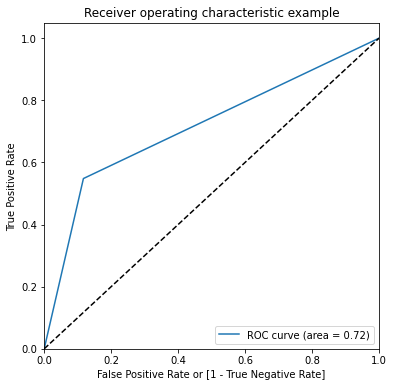

(array([0.       , 0.1171466, 1.       ]),
 array([0.        , 0.54810997, 1.        ]),
 array([2, 1, 0]))

In [310]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

- We saw the process of building a churn prediction model using logistic regression. Some important problems with this process are:

- **Multicollinearity among a large number of variables**, which is not totally avoided even after reducing variables using RFE (or a similar technique)
- **Need to use a lengthy iterative procedure**, i.e. identifying collinear variables, using variable selection techniques, dropping insignificant ones etc.
- A **potential loss of information** due to dropping variables
- **Model instability** due to multicollinearity



#### We see an overall AUC score of 0.71looks like we did a decent job.
- But we did spend a lot of effort on the features and their selection.
- Can PCA help reduce our effort?

# PCA on Data 

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [311]:
X_train.shape

(4922, 23)

In [312]:
## importing libraries
from sklearn.decomposition import PCA

In [313]:
## instantiating pca object
pca = PCA(random_state=42)
## fitting into PCA
pca.fit(X_train)

PCA(random_state=42)

In [314]:
## pca components
pca.components_

array([[ 4.50126506e-01,  2.01060161e-02,  7.02372069e-02,
         4.80091969e-01,  5.71411291e-01,  3.43233747e-02,
         9.78460252e-02,  1.33086734e-02,  2.99284986e-02,
         7.80605636e-02,  4.43814479e-02,  1.27271024e-02,
        -9.87802528e-02,  3.32470860e-04,  1.44756196e-01,
        -1.31736627e-01,  1.57751860e-01,  1.17150005e-01,
         1.55536458e-01,  1.61554483e-01,  1.24688112e-01,
         1.76245171e-01,  1.77263329e-01],
       [ 5.62621784e-01, -4.09495637e-02, -1.72231867e-01,
        -5.28394150e-01,  1.74875646e-01, -8.28986089e-02,
         1.48041906e-01,  1.41606275e-01,  6.21721387e-02,
         2.33151873e-01,  9.10410035e-02, -2.28191415e-01,
         6.88874927e-02,  1.02882456e-02, -2.96357034e-01,
         2.14487090e-01, -5.51602790e-02,  5.53907952e-02,
        -6.25856782e-03, -1.74131226e-02,  3.79221448e-02,
        -1.20182812e-01, -1.17854057e-01],
       [-2.50075564e-01, -1.81454014e-01, -1.50236058e-01,
         6.77487786e-02, -4.6

In [315]:
## explained variance ratio
pca.explained_variance_ratio_

array([3.96689921e-01, 1.65202994e-01, 4.74779190e-02, 3.93620574e-02,
       3.53380558e-02, 3.36084962e-02, 3.03552527e-02, 2.91443761e-02,
       2.79470488e-02, 2.67181550e-02, 2.17882988e-02, 2.05601089e-02,
       1.99674658e-02, 1.86057639e-02, 1.74382083e-02, 1.56226842e-02,
       1.39945449e-02, 1.15277860e-02, 8.83636901e-03, 7.40322191e-03,
       6.78778286e-03, 5.57299636e-03, 5.04925711e-05])

### Skree Plot

In [316]:
cumm  = np.cumsum(pca.explained_variance_ratio_)
cumm

array([0.39668992, 0.56189292, 0.60937083, 0.64873289, 0.68407095,
       0.71767944, 0.7480347 , 0.77717907, 0.80512612, 0.83184428,
       0.85363258, 0.87419268, 0.89416015, 0.91276591, 0.93020412,
       0.94582681, 0.95982135, 0.97134914, 0.98018551, 0.98758873,
       0.99437651, 0.99994951, 1.        ])

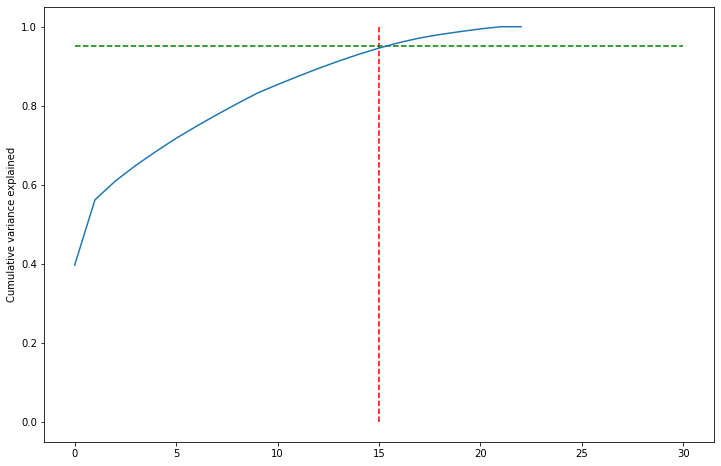

In [317]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(cumm)
plt.ylabel("Cumulative variance explained")
plt.show()

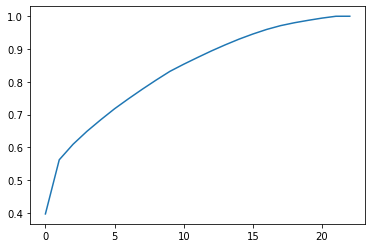

In [318]:
plt.plot(cumm)
plt.show()

- We can see that at about 15-17 components we can explain 95% variance
- So we will Perform PCA with 16 components

In [319]:
## importing libraries
from sklearn.decomposition import IncrementalPCA

In [320]:
## instantiating PCA object
pca16 = IncrementalPCA(n_components=16)

In [321]:
## fitting
## df_train_pca is the new X_train as per PCA
df_train_pca = pca16.fit_transform(X_train)
df_train_pca.shape

(4922, 16)

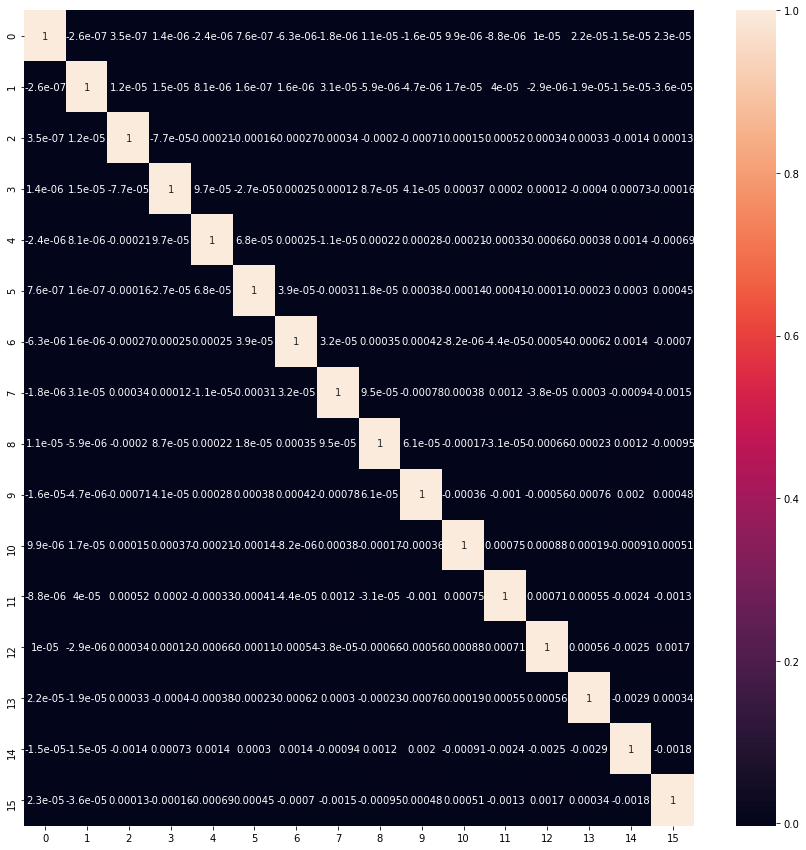

In [322]:
## checking correlations
plt.figure(figsize=[15,15])
corrmat = np.corrcoef(df_train_pca.transpose())
sns.heatmap(corrmat,annot=True)
plt.show()

- All the correlations are close to zero, PCA is successful
- So we have not only reduced the number of components, but also made sure that they are not correlated with each other.


- Transposing a DataFrame with mixed dtypes will result in a homogeneous DataFrame with the object dtype. In such a case, a copy of the data is always made.

**Square DataFrame with homogeneous dtype**
- When the dtype is homogeneous in the original DataFrame, we get a transposed DataFrame with the same dtype.

**Non-square DataFrame with mixed dtypes**
- When the DataFrame has mixed dtypes, we get a transposed DataFrame with the object dtype

### Applyting the transformation on the test set

In [323]:
## new X_test as per PCA
df_test_pca = pca16.transform(X_test)
df_test_pca.shape

(2110, 16)

- Now that be have solid data using PCA, we can apply any model on it

### Applying logistic regression on the data on our Principal components

In [324]:
## importing libraries
from sklearn.linear_model import LogisticRegression

In [325]:
## making vanilla lr model
## instantiating object
lr_pca = LogisticRegression()
## fitting 
model_pca = lr_pca.fit(df_train_pca,y_train)

#### Making predictions on the test set

In [326]:
## making predcitions
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [336]:
y_test.shape

(2110, 2)

In [337]:
type(y_test)

pandas.core.frame.DataFrame

In [352]:
y_test.head()

,Churn,CustID
0,0,942
1,1,3730
2,0,1761
3,1,2283
4,0,1872


- y_test is a dataframe with two columns Churn and CustID.
- We only need Churn to feed in to roc_auc_score
- So we will drop custID from y_test and then feed it to the roc_auc_curve

In [348]:
a = y_test.drop('CustID',axis=1)

In [350]:
a.shape

(2110, 1)

In [351]:
roc_auc_score(a,pred_probs_test[:,1])

0.8235328844389269

This is a better result than we got earlier and this time around, we did not do any feature selection
Without all those steps in GLM model, we have the right featurers, Dimensionality reduction and very-very low correlations
So PCA gave us a very good result with very little effort
POWER OF PCA

### Model Building with PCA
- In the second part, first, we'll reduce the dimensions that we have using PCA and then create a logistic regression model on it.

- As we could see, with PCA, we could achieve the same results with just a couple of lines of code. 
-It will be helpful to note that the baseline PCA model has performed at par with the best Logistic Regression model built after the feature elimination and other steps.
- PCA helped us solve the problem of multicollinearity (and thus model instability), loss of information due to the dropping of variables, and we don't need to use iterative feature selection procedures. 
- Also, our model becomes much faster because it has to run on a smaller dataset. And even then, our ROC score, which is a key model performance metric is similar to what we achieved previously.
- To sum it up, if we're doing any sort of modelling activity on a large dataset containing lots of variables, it is a good practice to perform PCA on that dataset first, reduce the dimensionality and then go ahead and create the model that we wanted to make in the first place. 
- It is advisable to perform PCA on the datasets that we worked on in Linear Regression and Clustering as well, to see how it makes our job easier.

## Improving Model Performance - II

#### Making it a little more unsupervised
- Till now, we've been looking at the scree-plot to choose the number of components that explain a certain amount of variance before going for the dimensionality reduction using PCA. 
- Now, there is a nice functionality which makes this process even more unsupervised. All we need to do is select the amount of variance that we want our final dataset to capture and PCA does the rest for you. 
-Let's take a look at the following demonstration to see how we can do the same.

In [353]:
## Let's say we want 90% of variance to be expalined by the model
pca_again = PCA(.9)

In [354]:
## fitting; df_train_pca2 gives us the new X_train 
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape

(4922, 14)

- So to explain 90% variance, PCA has selected 14 columns

### Following it up with a logistic regression model

In [355]:
## vanilla lr model
learner_pca2  = LogisticRegression()

In [356]:
## fitting
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [357]:
## new X_test
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(2110, 14)

In [358]:
## predicted probabilities
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)

In [359]:
## dropping custID from y_test
## we already created the variable a for this
a.head()

,Churn
0,0
1,1
2,0
3,1
4,0


In [361]:
### roc_auc_score
roc_auc_score(a,pred_probs_test2[:,1])

0.8235328844389271

- As we saw above, all we needed to do was select a particular amount of variance that we want to be explained by the Principal Components of the transformed dataset.
- PCA automatically chooses the appropriate number of components on its own and proceeds with the transformation. 
- This again saves us a lot of time!
- PCA is great!

## Summary

- Here's a summary of our learnings in the last two segments:
   - We understood the importance of PCA in model building. Essentially before we build any model, we perform PCA to reduce its dimensionality.
   - This results in a smaller dataset with uncorrelated features - thereby leading to faster execution and a much more stable model.
   - We observed that performing PCA and then doing the actual model greatly improves its efficiency and also does that without any iterative procedures.